In [1]:
!pip install transformer_lens sae_lens

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.

In [1]:
from huggingface_hub import login
from google.colab import userdata
import transformer_lens
from transformer_lens import HookedTransformer
import torch
import psutil
import subprocess


login(userdata.get('HF_TOKEN'))

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Check RAM
ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
print('Not using a high-RAM runtime' if ram_gb < 20 else 'You are using a high-RAM runtime!')

# Check GPU
try:
    gpu_info = subprocess.check_output(['nvidia-smi'], text=True)
    print(gpu_info)
except:
    print('Not connected to a GPU')

Using device: cuda
Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!
Mon Apr 21 04:14:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             46W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                    

In [2]:
# Load the model
MODEL_NAME = 'google/gemma-2-2b'

model = HookedTransformer.from_pretrained(
    MODEL_NAME,
    device=device,
    fold_ln=True,  # Fold RMSNorm weights as per Gemma Scope recommendation
    center_unembed=False,  # Gemma 2 uses logits soft-capping, so no centering
    center_writing_weights=False  # Only valid for LayerNorm, not RMS
)

# Verify model loading
print(model)

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/481M [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Loaded pretrained model google/gemma-2-2b into HookedTransformer
HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (blocks): ModuleList(
    (0-25): 26 x TransformerBlock(
      (ln1): RMSNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln1_post): RMSNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): RMSNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2_post): RMSNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): GroupedQueryAttention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
        (hook_rot_k): HookPoint()
        (hook_rot_q): HookPoint()
      )
      (mlp): GatedMLP(
        (hook_p

# BASELINE RESULTS

1. Perpelxity on wikitext 2 after removing tokens related to the unlearn target.
2. Perplexity on the unlean target

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [5]:
import pandas as pd
from datasets import load_dataset
import re

# Load Harry Potter Book 1 text
with open("/content/drive/MyDrive/Unlearning/Harry_Potter_Book1.txt", "r") as f:
    hp_text = f.read()

# read keywords from keywords.txt
with open("/content/drive/MyDrive/Unlearning/keywords.txt", "r") as f:
    hp_keywords = f.read()

# Clean keywords: remove trailing periods and normalize
# hp_keywords = [re.sub(r'\.$', '', kw).strip() for kw in hp_keywords]
hp_keywords = hp_keywords.split('\n')

hp_keywords = [
    re.sub(r'\.$', '', kw).strip()
    for kw in hp_keywords
    if kw.strip()  # keeps only non‑empty strings
]


# # Function to remove words that appear in Harry Potter book
def remove_hp_words(example):
    text = example["text"]
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in hp_keywords]
    cleaned_text = " ".join(cleaned_words)
    return {"text": cleaned_text}

# Load WikiText-2 test set
wikitext2 = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")

# Apply preprocessing to remove Harry Potter words
wikitext2_clean = wikitext2.map(remove_hp_words)

# Load Harry Potter Book 1 text for later use
hp_chunks = hp_text.split("\n\n")  # Split by paragraphs
hp_dataset = [{"text": chunk} for chunk in hp_chunks if chunk.strip()]

Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

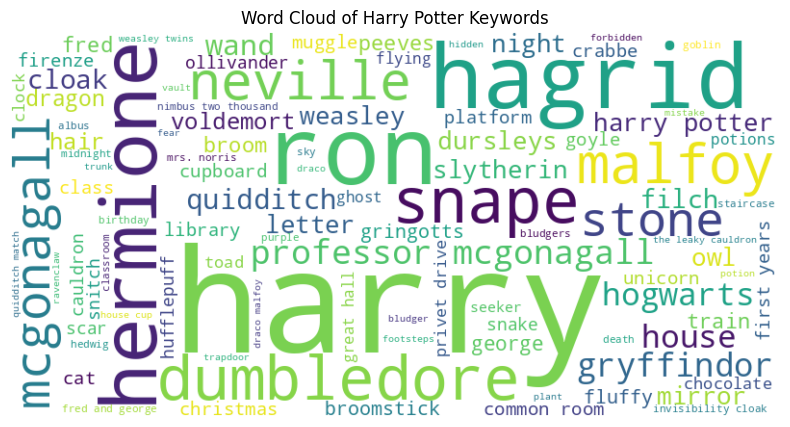

In [6]:
# Count occurrences of each keyword in the text

keyword_counts = Counter()
for kw in set(hp_keywords):
    kw = kw.strip()
    pattern = r'\b' + re.escape(kw) + r'\b'
    count = len(re.findall(pattern, hp_text.lower()))
    if count > 0:
        keyword_counts[kw] = count

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    max_font_size=150,
    collocations=False  # Prevent combining phrases
).generate_from_frequencies(keyword_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Harry Potter Keywords')


# plt.savefig('wordcloud.png', bbox_inches='tight')
plt.show()
plt.close()

In [7]:
print("Sample from wikitext2_clean:", wikitext2_clean[55])
print("Sample from hp_dataset:", hp_dataset[65])

Sample from wikitext2_clean: {'text': 'Brooding on what I have lived through , if even I know such suffering , the common man must surely be rattled by the winds .'}
Sample from hp_dataset: {'text': '“It’s lucky it’s dark. I haven’t blushed so much since Madam Pomfrey told me she liked my new earmuffs.”'}


In [8]:
# creating a test set
wikitext2_small = [wikitext2[i] for i in range(1000)]
wikitext2_cleaned_small = [wikitext2_clean[i] for i in range(1000)]
hp_dataset_small = [hp_dataset[i] for i in range(1000)]

In [9]:
import torch.nn.functional as F
from tqdm import tqdm
from datasets import Dataset

def compute_perplexity(dataset, model, device, max_samples=None):
    total_loss = 0.0
    total_tokens = 0
    # # Handle dataset slicing based on type
    # if max_samples is None:
    #     samples = dataset
    # else:
    #     if isinstance(dataset, Dataset):
    #         samples = dataset[:max_samples]
    #     else:  # Assume list or similar iterable
    #         samples = dataset[:max_samples]
    print("\n")
    for sample in tqdm(dataset, desc="Evaluating perplexity"):
        # Handle both dictionary and string inputs
        text = sample["text"].strip() if isinstance(sample, dict) else sample.strip()
        if not text:
            continue
        tokens = model.to_tokens(text).to(device)
        with torch.no_grad():
            logits = model(tokens)
        shift_logits = logits[:, :-1, :]
        shift_labels = tokens[:, 1:]
        loss = F.cross_entropy(
            shift_logits.reshape(-1, shift_logits.size(-1)),
            shift_labels.reshape(-1),
            reduction="sum"
        )
        total_loss += loss.item()
        total_tokens += shift_labels.numel()
    avg_loss = total_loss / total_tokens if total_tokens > 0 else float('inf')
    perplexity = torch.exp(torch.tensor(avg_loss))
    return perplexity.item()


In [10]:
# Compute Baseline 0: Perplexity on  WikiText-2
baseline0 = compute_perplexity(wikitext2_small, model, device, max_samples=1000)
print(f"\nBaseline 0 - Perplexity on WikiText-2: {baseline0:.2f}")

baseline1 = compute_perplexity(wikitext2_cleaned_small, model, device, max_samples=1000)
print(f"\nBaseline 1 - Perplexity on cleaned WikiText-2: {baseline1:.2f}")   #need to do better cleaning

# Compute Baseline 2: Perplexity on Harry Potter Book 1
baseline2 = compute_perplexity(hp_dataset_small, model, device, max_samples=1000)
print(f"\nBaseline 2 - Perplexity on Harry Potter Book 1: {baseline2:.2f}")

Evaluating perplexity: 100%|██████████| 1000/1000 [01:22<00:00, 12.19it/s]



Baseline 0 - Perplexity on WikiText-2: 17.93




Evaluating perplexity: 100%|██████████| 1000/1000 [01:21<00:00, 12.34it/s]



Baseline 1 - Perplexity on cleaned WikiText-2: 18.37




Evaluating perplexity: 100%|██████████| 1000/1000 [01:49<00:00,  9.13it/s]


Baseline 2 - Perplexity on Harry Potter Book 1: 26.94


# Identify and Interpret Features

In [11]:
import pandas as pd
import requests
import json
import re
import time
from collections import Counter

print(len(hp_keywords))

2539


In [14]:
# prompt: sort keyword_counts by the number of occurences

sorted_keyword_counts = dict(sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True))
sorted_keyword_counts
top_50_keywords = list(sorted_keyword_counts.keys())[:50]
print(top_50_keywords)


['harry', 'ron', 'hagrid', 'hermione', 'snape', 'dumbledore', 'malfoy', 'neville', 'mcgonagall', 'stone', 'professor mcgonagall', 'gryffindor', 'hogwarts', 'house', 'wand', 'quidditch', 'cloak', 'filch', 'slytherin', 'dursleys', 'night', 'weasley', 'mirror', 'letter', 'harry potter', 'owl', 'voldemort', 'hair', 'dragon', 'fred', 'broom', 'peeves', 'train', 'george', 'gringotts', 'fluffy', 'broomstick', 'library', 'cat', 'christmas', 'goyle', 'unicorn', 'class', 'muggle', 'cupboard', 'crabbe', 'platform', 'common room', 'firenze', 'first years']


In [16]:
def get_harry_potter_features_with_explanations(api_key, layers, queries, max_results=20, delay=1.0):
    url_search = "https://www.neuronpedia.org/api/explanation/search"
    url_feature = "https://www.neuronpedia.org/api/feature/{modelId}/{layer}/{index}"
    headers = {
        "X-Api-Key": api_key,
        "Content-Type": "application/json"
    }
    sae_ids = [f"{layer}-gemmascope-res-16k" for layer in layers]
    features_per_layer = {layer: set() for layer in layers}

    # Step 1: Collect feature indices
    for query in queries:
        payload = {
            "modelId": "gemma-2-2b",
            "layers": sae_ids,
            "query": query,
            "offset": 0
        }
        results_fetched = 0
        while results_fetched < max_results:
            try:
                response = requests.post(url_search, headers=headers, data=json.dumps(payload))
                response.raise_for_status()
            except requests.exceptions.RequestException as e:
                print(f"API error for query '{query}': {e}")
                time.sleep(5)  # Wait before retrying
                continue

            data = response.json()
            results = data.get("results", [])
            for result in results:
                layer_str = result["layer"]
                layer_num = int(layer_str.split("-")[0])
                index = int(result["index"])
                features_per_layer[layer_num].add(index)
            results_fetched += len(results)
            if not data.get("hasMore", False):
                break
            payload["offset"] += 20
            time.sleep(delay)  # Delay to avoid rate limit

    # Convert sets to lists
    for layer in features_per_layer:
        features_per_layer[layer] = list(features_per_layer[layer])

    # Step 2: Fetch explanations for each feature
    feature_explanations = {layer: {} for layer in layers}
    for layer in layers:
        for idx in features_per_layer[layer]:
            sae_id = f"{layer}-gemmascope-res-16k"
            feature_url = url_feature.format(modelId="gemma-2-2b", layer=sae_id, index=idx)
            try:
                response = requests.get(feature_url, headers=headers)
                response.raise_for_status()
            except requests.exceptions.RequestException as e:
                print(f"Failed to fetch explanation for feature {idx} in layer {layer}: {e}")
                feature_explanations[layer][idx] = f"Feature_{idx}"
                time.sleep(5)  # Wait before retrying
                continue

            data = response.json()
            description = data.get("description", f"Feature_{idx}")
            description = " ".join(description.split()[:3])
            description = re.sub(r'[^a-zA-Z0-9\s]', '', description)
            feature_explanations[layer][idx] = description if description else f"Feature_{idx}"
            time.sleep(delay)  # Delay to avoid rate limit

    return features_per_layer, feature_explanations

In [17]:
layers = [0, 12, 25]

api_key = "sk-np-VhK3RJM07kmG2OcsfaUdxqqPNET1OTtvmTZM7ezVz0w0"
top_features, feature_explanations = get_harry_potter_features_with_explanations(api_key, layers, queries=top_50_keywords, max_results=2, delay=0.2)
print("Top features retrieved:", top_features)
# print("Feature explanations:", feature_explanations)

Top features retrieved: {0: [4, 14344, 4105, 10, 14, 22, 10283, 6196, 14391, 6201, 12345, 10305, 8258, 14402, 4164, 4165, 6218, 4171, 76, 14411, 2130, 10324, 87, 2139, 98, 10339, 10341, 2150, 4200, 12394, 6253, 4206, 6260, 12409, 8318, 2176, 2177, 4240, 2196, 6294, 12440, 14489, 6298, 4264, 176, 4286, 4299, 2258, 6355, 6356, 6360, 10461, 4318, 8415, 6368, 6369, 8420, 8425, 4330, 8427, 8441, 8450, 6404, 8454, 14600, 6411, 12560, 4372, 2324, 10519, 281, 6428, 10533, 4390, 295, 6442, 8493, 12590, 304, 6448, 8501, 12600, 12601, 2371, 6471, 6473, 8523, 14669, 334, 346, 12648, 362, 10618, 6526, 14723, 14735, 424, 433, 4533, 10681, 10684, 2498, 6599, 2504, 10708, 8663, 2521, 12773, 6633, 2537, 12794, 14847, 10752, 10755, 10758, 6662, 14865, 12820, 539, 6704, 4666, 12858, 4669, 4673, 12865, 12869, 4678, 12871, 2648, 2649, 8794, 612, 12907, 14958, 12916, 6774, 14966, 6776, 8828, 8831, 4748, 2700, 14992, 12948, 12960, 677, 681, 2730, 15019, 12969, 10927, 2736, 10929, 15023, 12979, 4792, 8889, 12

In [19]:
# Load SAEs for each layer
from sae_lens import SAE
saes = {}
for layer in layers:
    sae_id = f"layer_{layer}/width_16k/canonical"
    sae, _, _ = SAE.from_pretrained(
        release='gemma-scope-2b-pt-res-canonical',
        sae_id=sae_id,
        device=device
    )
    saes[layer] = sae

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

# Unlearning Via Ablation

In [20]:
# without ablation
model.generate('Who is Harry Potter?', max_new_tokens=50, temperature=0.1)

  0%|          | 0/50 [00:00<?, ?it/s]

'Who is Harry Potter?\n\nHarry Potter is a fictional character created by J.K. Rowling. He is the protagonist of the Harry Potter series of books and films. Harry is a wizard and the son of James and Lily Potter. He is the only child of James and'

In [21]:
# Define hook function for ablation
def ablate_features_hook(hidden_state, hook):
    layer = int(hook.name.split('.')[1])
    if layer in layers:
        sae = saes[layer]
        batch, seq_len, d_model = hidden_state.shape
        hidden_state_flat = hidden_state.view(batch * seq_len, d_model)
        feature_acts = sae.encode(hidden_state_flat)
        selected_features = torch.tensor(top_features[layer], device=device)
        feature_acts[:, selected_features] = 0
        modified_hidden_state_flat = sae.decode(feature_acts)
        modified_hidden_state = modified_hidden_state_flat.view(batch, seq_len, d_model)
        return modified_hidden_state
    return hidden_state

# Define prompt and tokens
prompt = "Tell me about Harry Potter"
tokens = model.to_tokens(prompt)

# Define hooks
hooks = [(f'blocks.{layer}.hook_resid_pre', ablate_features_hook) for layer in layers]

# Generate text with ablation
model.reset_hooks()
with model.hooks(fwd_hooks=hooks):
    generated_tokens_with_ablation = model.generate(
        tokens,
        max_new_tokens=50,
        temperature=0.1
    )
    print("Output with Harry Potter features ablated:")
    print(model.to_string(generated_tokens_with_ablation))

  0%|          | 0/50 [00:00<?, ?it/s]

Output with Harry Potter features ablated:
['<bos>Tell me about Harry Potter\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n']


In [22]:
import torch.nn.functional as F
from tqdm import tqdm
from datasets import Dataset

def compute_perplexity_with_ablation(dataset, model, device, hooks=None, max_samples=None):
    """
    Compute perplexity on a dataset with optional ablation hooks applied.

    Args:
        dataset: Hugging Face Dataset or list of samples (dict or str).
        model: TransformerLens HookedTransformer model.
        device: Device to run computations on ('cuda' or 'cpu').
        hooks: Single hook tuple, list of hook tuples, or None (no ablation).
        max_samples: Maximum number of samples to process (None for all).

    Returns:
        Perplexity score (float).
    """
    total_loss = 0.0
    total_tokens = 0

    # Normalize hooks input: convert single hook to list, handle None
    hooks = [hooks] if isinstance(hooks, tuple) else hooks
    hooks = hooks if hooks is not None else []
    model.reset_hooks()

    # Handle dataset slicing
    if max_samples is None:
        samples = dataset
    else:
        if isinstance(dataset, Dataset):
            samples = dataset.select(range(min(max_samples, len(dataset))))
        else:  # Assume list or similar iterable
            samples = dataset[:max_samples]

    for sample in tqdm(samples, desc="Evaluating perplexity with ablation"):
        # Handle both dictionary and string inputs
        text = sample["text"].strip() if isinstance(sample, dict) else sample.strip()
        if not text:
            continue
        tokens = model.to_tokens(text).to(device)
        with model.hooks(fwd_hooks=hooks):
            with torch.no_grad():
                logits = model(tokens)
        shift_logits = logits[:, :-1, :]
        shift_labels = tokens[:, 1:]
        loss = F.cross_entropy(
            shift_logits.reshape(-1, shift_logits.size(-1)),
            shift_labels.reshape(-1),
            reduction="sum"
        )
        total_loss += loss.item()
        total_tokens += shift_labels.numel()

    avg_loss = total_loss / total_tokens if total_tokens > 0 else float('inf')
    perplexity = torch.exp(torch.tensor(avg_loss))
    return perplexity.item()


In [27]:
for key in top_features.keys():
    print(f"Layer {key}: {len(top_features[key])} features")

Layer 0: 439 features
Layer 12: 180 features
Layer 25: 200 features


In [26]:
# Compute perplexity with ablation on layer 0 (hook[0])
layer = 0
hook = hooks[0]  # Hook for layer 0

# On original WikiText-2
perplexity_wikitext2_layer0 = compute_perplexity_with_ablation(
    wikitext2_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on original WikiText-2: {perplexity_wikitext2_layer0:.2f}")

# On cleaned WikiText-2
perplexity_cleaned_layer0 = compute_perplexity_with_ablation(
    wikitext2_cleaned_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on cleaned WikiText-2: {perplexity_cleaned_layer0:.2f}")

# On Harry Potter Book 1
perplexity_hp_layer0 = compute_perplexity_with_ablation(
    hp_dataset_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on Harry Potter Book 1: {perplexity_hp_layer0:.2f}")

Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:22<00:00, 12.09it/s]


Layer 0 - Perplexity on original WikiText-2: 283.47


Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:21<00:00, 12.20it/s]


Layer 0 - Perplexity on cleaned WikiText-2: 284.02


Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:51<00:00,  8.97it/s]

Layer 0 - Perplexity on Harry Potter Book 1: 243.55


In [28]:
# Compute perplexity with ablation on layer 12 (hook[1])
layer = 12
hook = hooks[1]  # Hook for layer 12

# On original WikiText-2
perplexity_wikitext2_layer12 = compute_perplexity_with_ablation(
    wikitext2_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on original WikiText-2: {perplexity_wikitext2_layer12:.2f}")

# On cleaned WikiText-2
perplexity_cleaned_layer12 = compute_perplexity_with_ablation(
    wikitext2_cleaned_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on cleaned WikiText-2: {perplexity_cleaned_layer12:.2f}")

# On Harry Potter Book 1
perplexity_hp_layer12 = compute_perplexity_with_ablation(
    hp_dataset_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on Harry Potter Book 1: {perplexity_hp_layer12:.2f}")

Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:22<00:00, 12.08it/s]


Layer 12 - Perplexity on original WikiText-2: 52.98


Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:22<00:00, 12.11it/s]


Layer 12 - Perplexity on cleaned WikiText-2: 54.14


Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:50<00:00,  9.01it/s]

Layer 12 - Perplexity on Harry Potter Book 1: 137.55


In [29]:
# Compute perplexity with ablation on layer 25 (hook[1])
layer = 25
hook = hooks[2]  # Hook for layer 25

# On original WikiText-2
perplexity_wikitext2_layer25 = compute_perplexity_with_ablation(
    wikitext2_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on original WikiText-2: {perplexity_wikitext2_layer25:.2f}")

# On cleaned WikiText-2
perplexity_cleaned_layer25 = compute_perplexity_with_ablation(
    wikitext2_cleaned_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on cleaned WikiText-2: {perplexity_cleaned_layer25:.2f}")

# On Harry Potter Book 1
perplexity_hp_layer25 = compute_perplexity_with_ablation(
    hp_dataset_small, model, device, hooks=hook, max_samples=1000
)
print(f"Layer {layer} - Perplexity on Harry Potter Book 1: {perplexity_hp_layer25:.2f}")

Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:22<00:00, 12.14it/s]


Layer 25 - Perplexity on original WikiText-2: 38.50


Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:22<00:00, 12.16it/s]


Layer 25 - Perplexity on cleaned WikiText-2: 39.19


Evaluating perplexity with ablation: 100%|██████████| 1000/1000 [01:51<00:00,  8.98it/s]

Layer 25 - Perplexity on Harry Potter Book 1: 46.45


In [30]:
# Select a few Harry Potter-related prompts
hp_sample_prompts = [
    "Who is harry Potter?",
    "Tell me about Harry Potter's adventures at Hogwarts.",
    "What is the significance of the Sorting Hat in Hogwarts?",
    "Describe a Quidditch match at Hogwarts."
] if 'hp_prompts' not in globals() else hp_prompts[:3]

# Select a few unrelated prompts
unrelated_sample_prompts = [
    "Explain the history of the Roman Empire.",
    "What are the benefits of a healthy diet?",
    "Describe a typical day in a modern city."
] if 'general_prompts' not in globals() else general_prompts[:3]

print("Harry Potter Prompts:", hp_sample_prompts)
print("Unrelated Prompts:", unrelated_sample_prompts)

Harry Potter Prompts: ['Who is harry Potter?', "Tell me about Harry Potter's adventures at Hogwarts.", 'What is the significance of the Sorting Hat in Hogwarts?', 'Describe a Quidditch match at Hogwarts.']
Unrelated Prompts: ['Explain the history of the Roman Empire.', 'What are the benefits of a healthy diet?', 'Describe a typical day in a modern city.']


In [31]:
def generate_with_hooks(model, prompt, hooks=None, max_new_tokens=50, temperature=0.7):
    """
    Generate text for a given prompt with specified hooks applied.

    Args:
        model: HookedTransformer model.
        prompt: Input prompt (str).
        hooks: Single hook tuple, list of hooks, or None.
        max_new_tokens: Number of new tokens to generate.
        temperature: Sampling temperature.

    Returns:
        Generated text (str).
    """
    tokens = model.to_tokens(prompt)
    hooks = [hooks] if isinstance(hooks, tuple) else hooks
    hooks = hooks if hooks is not None else []

    model.reset_hooks()
    with model.hooks(fwd_hooks=hooks):
        generated_tokens = model.generate(
            tokens,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            verbose=False
        )
    return model.to_string(generated_tokens)[0]

In [33]:
# Generate samples for each condition
conditions = [
    ("No Ablation", None),
    ("Layer 0 Ablation", hooks[0]),
    ("Layer 12 Ablation", hooks[1]),
    ("Layer 25 Ablation", hooks[2])
]

# Generate for Harry Potter prompts
print("=== Harry Potter Prompts ===")
for prompt in hp_sample_prompts:
    print(f"\nPrompt: {prompt}")
    for condition_name, hook in conditions:
        generated = generate_with_hooks(
            model, prompt, hooks=hook, max_new_tokens=50, temperature=0.1
        )
        print(f"{condition_name}: {generated}")

# Generate for unrelated prompts
print("\n=== Unrelated Prompts ===")
for prompt in unrelated_sample_prompts:
    print(f"\nPrompt: {prompt}")
    for condition_name, hook in conditions:
        generated = generate_with_hooks(
            model, prompt, hooks=hook, max_new_tokens=50, temperature=0.1
        )
        print(f"{condition_name}: {generated}")

=== Harry Potter Prompts ===

Prompt: Who is harry Potter?
No Ablation: <bos>Who is harry Potter?

Harry Potter is a fictional character created by J.K. Rowling. He is the main protagonist of the Harry Potter series. He is a wizard and the only child of James and Lily Potter. He is the only survivor of the Potters,
Layer 0 Ablation: <bos>Who is harry Potter?

<h2><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em><strong><em>
Layer 12 Ablation: <bos>Who is harry Potter?
Harry Potter is a fictional character in a series of novels by a British author, a serial of novels by a British author, a serial of novels by a British author, a serial of novels by a British author, a serial of novels by a
Layer 25 Ablation: <bos>Who is harry Potter?

The only way to know is to re

In [ ]:
prompt=''
generated = generate_with_hooks(
            model, prompt, hooks=hook, max_new_tokens=50, temperature=0.1
        )